In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("https://placement-analysis.s3.amazonaws.com/placementprediction.csv")
df

,Age,Gender,Stream,Internships,CGPA,HistoryOfBacklogs,PlacedOrNot,CodingSkills,Aptitude Skills,TechnicalSkills,Communication Skills
0,22,Male,Electronics And Communication,1,8,1,1,85,85,90,30
1,21,Female,Computer Science,0,7,1,1,89,90,85,35
2,22,Female,Information Technology,1,6,0,1,80,85,90,45
3,21,Male,Information Technology,0,8,1,1,95,90,90,20
4,22,Male,Mechanical,0,8,0,1,95,85,80,75
...,...,...,...,...,...,...,...,...,...,...,...
2961,23,Male,Information Technology,0,7,0,0,58,45,89,75
2962,23,Male,Mechanical,1,7,0,0,64,54,56,60
2963,22,Male,Information Technology,1,7,0,0,74,78,65,71
2964,22,Male,Computer Science,1,7,0,0,20,87,45,85


In [3]:
df=df.rename(columns={'HistoryOfBacklogs': 'Backlogs','Aptitude Skills':'AptitudeSkills','Communication Skills':'CommunicationSkills'})

df

,Age,Gender,Stream,Internships,CGPA,Backlogs,PlacedOrNot,CodingSkills,AptitudeSkills,TechnicalSkills,CommunicationSkills
0,22,Male,Electronics And Communication,1,8,1,1,85,85,90,30
1,21,Female,Computer Science,0,7,1,1,89,90,85,35
2,22,Female,Information Technology,1,6,0,1,80,85,90,45
3,21,Male,Information Technology,0,8,1,1,95,90,90,20
4,22,Male,Mechanical,0,8,0,1,95,85,80,75
...,...,...,...,...,...,...,...,...,...,...,...
2961,23,Male,Information Technology,0,7,0,0,58,45,89,75
2962,23,Male,Mechanical,1,7,0,0,64,54,56,60
2963,22,Male,Information Technology,1,7,0,0,74,78,65,71
2964,22,Male,Computer Science,1,7,0,0,20,87,45,85


In [4]:
df.shape

(2966, 11)

In [5]:
df.dtypes

Age                     int64
Gender                 object
Stream                 object
Internships             int64
CGPA                    int64
Backlogs                int64
PlacedOrNot             int64
CodingSkills            int64
AptitudeSkills          int64
TechnicalSkills         int64
CommunicationSkills     int64
dtype: object

In [6]:
df.Stream.unique()

array(['Electronics And Communication', 'Computer Science',
       'Information Technology', 'Mechanical', 'Electrical', 'Civil'],
      dtype=object)

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
le=LabelEncoder()

In [9]:
df['Gender']=le.fit_transform(df['Gender'])
df['Stream']=le.fit_transform(df['Stream'])
df

,Age,Gender,Stream,Internships,CGPA,Backlogs,PlacedOrNot,CodingSkills,AptitudeSkills,TechnicalSkills,CommunicationSkills
0,22,1,3,1,8,1,1,85,85,90,30
1,21,0,1,0,7,1,1,89,90,85,35
2,22,0,4,1,6,0,1,80,85,90,45
3,21,1,4,0,8,1,1,95,90,90,20
4,22,1,5,0,8,0,1,95,85,80,75
...,...,...,...,...,...,...,...,...,...,...,...
2961,23,1,4,0,7,0,0,58,45,89,75
2962,23,1,5,1,7,0,0,64,54,56,60
2963,22,1,4,1,7,0,0,74,78,65,71
2964,22,1,1,1,7,0,0,20,87,45,85


In [10]:
df.isnull().sum()

Age                    0
Gender                 0
Stream                 0
Internships            0
CGPA                   0
Backlogs               0
PlacedOrNot            0
CodingSkills           0
AptitudeSkills         0
TechnicalSkills        0
CommunicationSkills    0
dtype: int64

In [11]:
df.describe()

,Age,Gender,Stream,Internships,CGPA,Backlogs,PlacedOrNot,CodingSkills,AptitudeSkills,TechnicalSkills,CommunicationSkills
count,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000
mean,21.485840,0.834457,2.562374,0.703641,7.073837,0.192178,0.552596,46.310856,42.326028,40.342212,41.206676
std,1.324933,0.371732,1.653853,0.740197,0.967748,0.394079,0.497310,26.557579,25.128296,26.881952,21.351237
min,19.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,5.000000,7.000000,1.000000,10.000000
25%,21.000000,1.000000,1.000000,0.000000,6.000000,0.000000,0.000000,24.000000,21.000000,17.000000,24.000000
50%,21.000000,1.000000,3.000000,1.000000,7.000000,0.000000,1.000000,42.000000,34.000000,31.000000,31.000000
75%,22.000000,1.000000,4.000000,1.000000,8.000000,0.000000,1.000000,67.000000,64.000000,65.000000,56.000000
max,30.000000,1.000000,5.000000,3.000000,9.000000,1.000000,1.000000,98.000000,98.000000,98.000000,93.000000


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Gender'}>,
        <AxesSubplot:title={'center':'Stream'}>],
       [<AxesSubplot:title={'center':'Internships'}>,
        <AxesSubplot:title={'center':'CGPA'}>,
        <AxesSubplot:title={'center':'Backlogs'}>],
       [<AxesSubplot:title={'center':'PlacedOrNot'}>,
        <AxesSubplot:title={'center':'CodingSkills'}>,
        <AxesSubplot:title={'center':'AptitudeSkills'}>],
       [<AxesSubplot:title={'center':'TechnicalSkills'}>,
        <AxesSubplot:title={'center':'CommunicationSkills'}>,
        <AxesSubplot:>]], dtype=object)

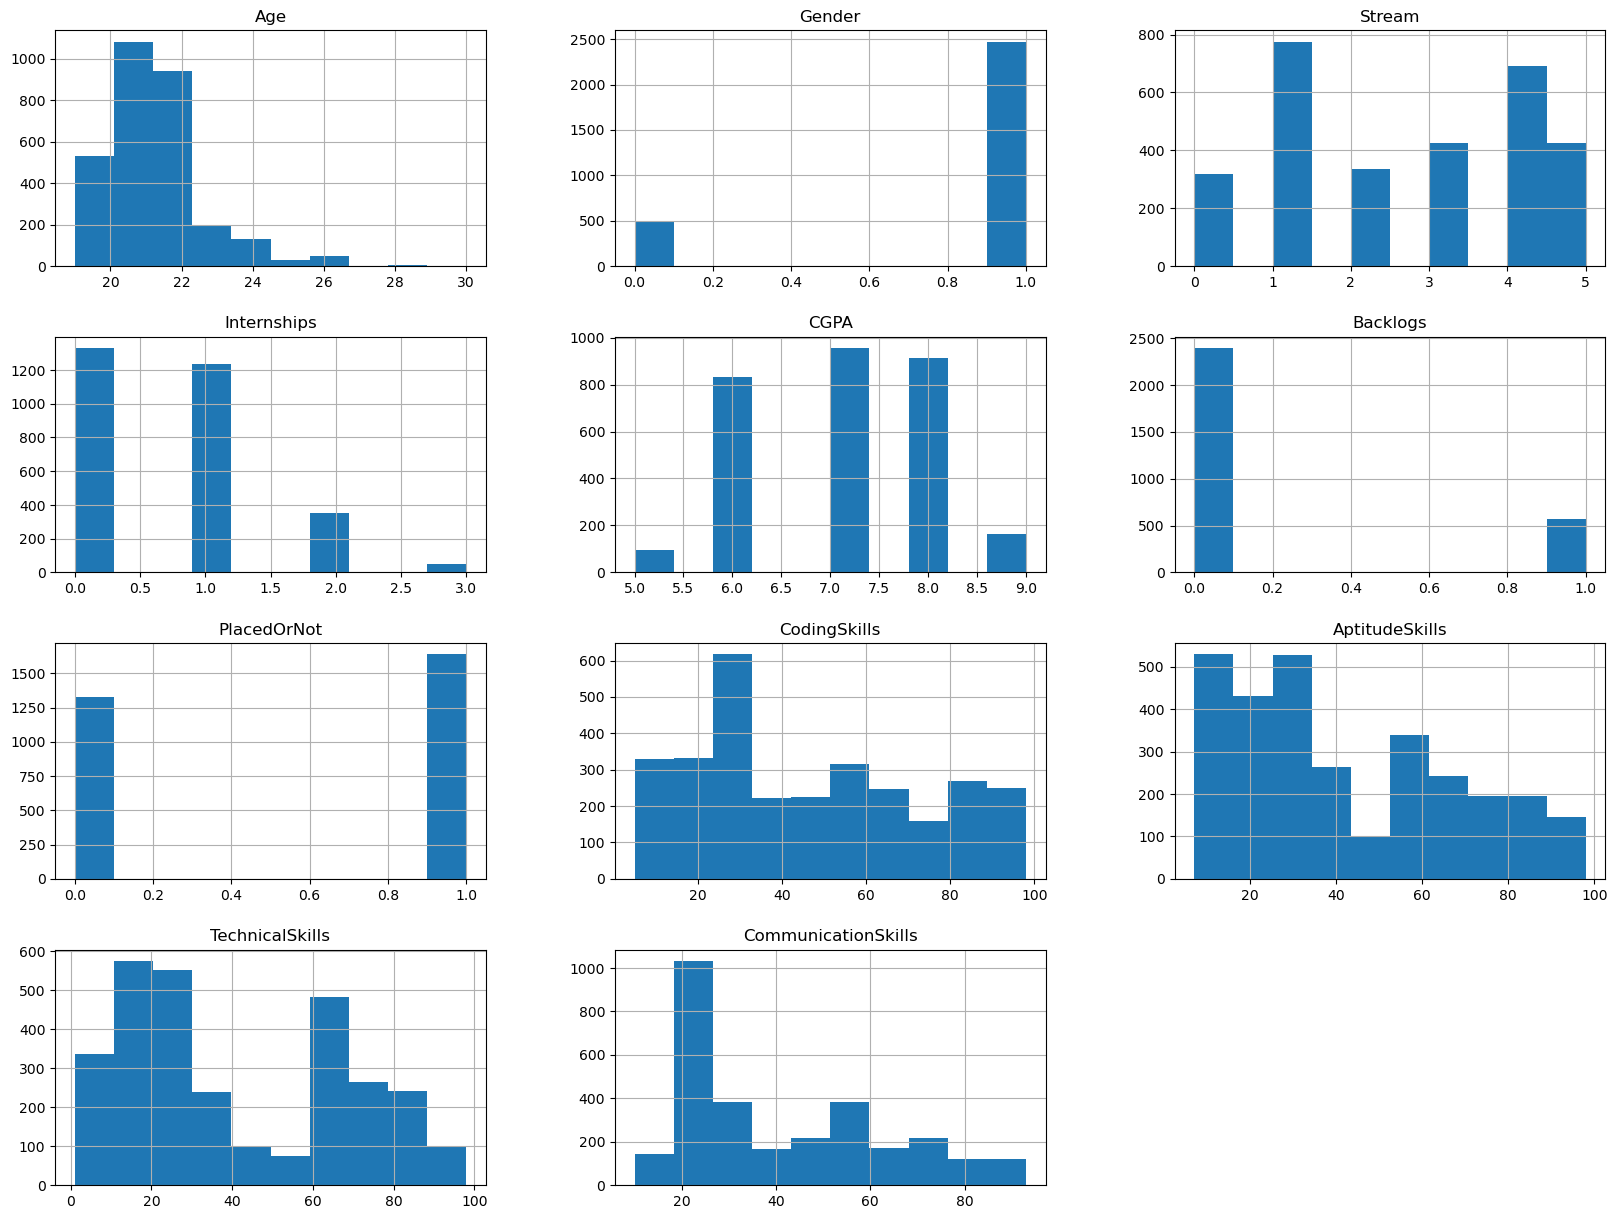

In [12]:
df.hist(figsize = (20,15))

<AxesSubplot:>

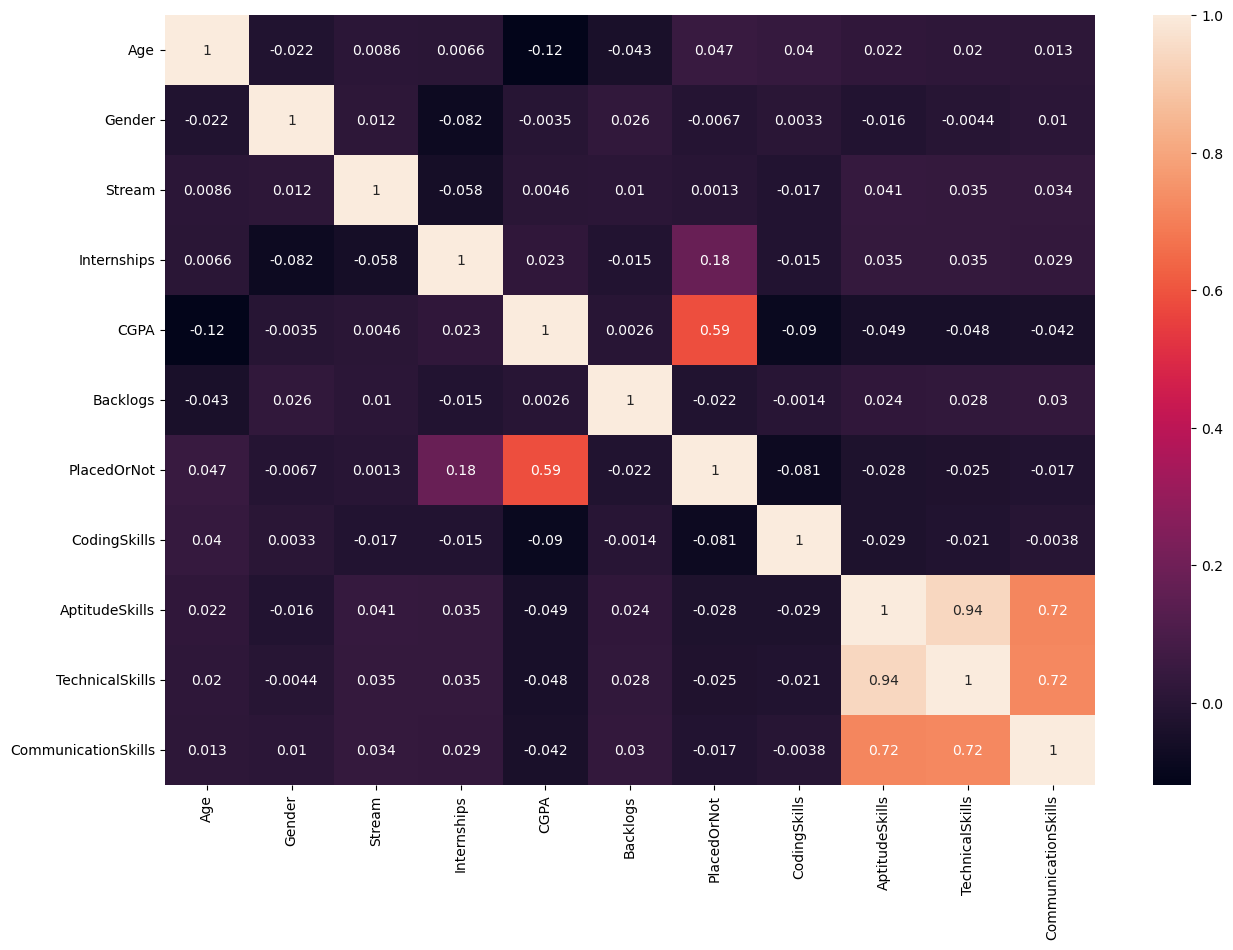

In [13]:
import seaborn as sns
plt.figure(figsize=(15,10))
corrmat=df.corr()
sns.heatmap(corrmat, annot=True)

In [14]:
df = df.rename(columns={'Age' : 'age'})
df = df.rename(columns={'Gender' : 'gender'})
df = df.rename(columns={'Stream' : 'stream'})

df = df.rename(columns={'CGPA' : 'cgpa'})
df = df.rename(columns={'Backlogs' : 'backlogs'})
df = df.rename(columns={'CodingSkills' : 'codingskills'})
df = df.rename(columns={'AptitudeSkills' : 'aptitudeskills'})
df = df.rename(columns={'TechnicalSkills' : 'technicalskills'})
df = df.rename(columns={'CommunicationSkills' : 'communicationskills'})
df = df.rename(columns={'PlacedOrNot' : 'result'})
df

            


,age,gender,stream,Internships,cgpa,backlogs,result,codingskills,aptitudeskills,technicalskills,communicationskills
0,22,1,3,1,8,1,1,85,85,90,30
1,21,0,1,0,7,1,1,89,90,85,35
2,22,0,4,1,6,0,1,80,85,90,45
3,21,1,4,0,8,1,1,95,90,90,20
4,22,1,5,0,8,0,1,95,85,80,75
...,...,...,...,...,...,...,...,...,...,...,...
2961,23,1,4,0,7,0,0,58,45,89,75
2962,23,1,5,1,7,0,0,64,54,56,60
2963,22,1,4,1,7,0,0,74,78,65,71
2964,22,1,1,1,7,0,0,20,87,45,85


In [15]:
df = df.rename(columns={'Internships' : 'internships'})
df

,age,gender,stream,internships,cgpa,backlogs,result,codingskills,aptitudeskills,technicalskills,communicationskills
0,22,1,3,1,8,1,1,85,85,90,30
1,21,0,1,0,7,1,1,89,90,85,35
2,22,0,4,1,6,0,1,80,85,90,45
3,21,1,4,0,8,1,1,95,90,90,20
4,22,1,5,0,8,0,1,95,85,80,75
...,...,...,...,...,...,...,...,...,...,...,...
2961,23,1,4,0,7,0,0,58,45,89,75
2962,23,1,5,1,7,0,0,64,54,56,60
2963,22,1,4,1,7,0,0,74,78,65,71
2964,22,1,1,1,7,0,0,20,87,45,85


In [16]:
x=df.drop(['result'],axis='columns')
x

,age,gender,stream,internships,cgpa,backlogs,codingskills,aptitudeskills,technicalskills,communicationskills
0,22,1,3,1,8,1,85,85,90,30
1,21,0,1,0,7,1,89,90,85,35
2,22,0,4,1,6,0,80,85,90,45
3,21,1,4,0,8,1,95,90,90,20
4,22,1,5,0,8,0,95,85,80,75
...,...,...,...,...,...,...,...,...,...,...
2961,23,1,4,0,7,0,58,45,89,75
2962,23,1,5,1,7,0,64,54,56,60
2963,22,1,4,1,7,0,74,78,65,71
2964,22,1,1,1,7,0,20,87,45,85


In [17]:
y=df.result
y

0       1
1       1
2       1
3       1
4       1
       ..
2961    0
2962    0
2963    0
2964    0
2965    1
Name: result, Length: 2966, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=50)

In [19]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()


In [20]:
rfc.fit(x_train,y_train) 

RandomForestClassifier()

In [21]:
rfc.score(x_test,y_test)

0.8636363636363636

In [22]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()

In [23]:
DT.fit(x_train,y_train)

DecisionTreeClassifier()

In [24]:
DT.score(x_test,y_test)

0.8215488215488216

In [25]:
from sklearn.svm import SVC
model=SVC()

In [26]:
model.fit(x_train,y_train)

SVC()

In [27]:
model.score(x_test,y_test)

0.5791245791245792

In [28]:
rfc.predict([[22,1,3,1,8,1,85,85,90,30]])

array([1], dtype=int64)

In [29]:
rfc.predict([[22,1,1,1,7,0,20,87,45,85]])

array([0], dtype=int64)

In [30]:
import pickle
pickle.dump(rfc,open("rfcr.pkl","wb"))

In [31]:
model=pickle.load(open("rfcr.pkl","rb"))


In [32]:
rfc.predict([[22,1,1,1,7,0,20,87,45,85]])

array([0], dtype=int64)